## Project: supply chain
BI名企班 谢雅楠

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


In [8]:
## load data
with open('data.pkl', 'rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,HollowayCally,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,LunaIrene,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,MaldonadoGillian,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TateTana,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,HendricksOrli,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,PetersonMaria,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,ClarkRonald,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,SmithJohn,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,SmithMary,2016,1,4,20,2016-01


In [10]:
## fraud
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['fraud']
train_data['fraud'].sum()

4062

In [12]:
## late delivery
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)
train_data['late_delivery'].sum()

98977

In [17]:
for column in train_data.columns:
    if len(train_data[column].value_counts()) < 2:
        print(column)

Customer Email
Customer Password
Product Description
Product Status


In [20]:
train_data.drop(
    ['Customer Email',
     'Customer Password',
     'Product Description',
     'Product Status',
     'Product Image',
     'Product Description',
     'Customer Lname',
     'Customer Fname',
     'Customer Full Name'
     ], axis=1, inplace=True)

In [22]:
train_data.drop(
    ['Order Customer Id',
     'Order Item Cardprod Id',
     'Order Item Id',
     'Sales per customer',
     'Order Item Total',
     'Order Profit Per Order',
     'Product Card Id',
     'Product Category Id',
     'Product Price'
     ], axis=1, inplace=True)

In [25]:
train_data.drop(
    ['Order Zipcode',
     'shipping date (DateOrders)',
     'Latitude',
     'Longitude',
     'Customer Street'
     ], axis=1, inplace=True)

In [27]:
## categorical variables
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'Shipping Mode'],
      dtype='object')

In [29]:
## label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in categorical_cols:
    train_data[cat] = le.fit_transform(train_data[cat])
train_data[categorical_cols]

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode
0,1,0,40,66,1,0,36,4,3,331,70,15,475,2,78,3
1,3,1,40,66,1,0,36,4,3,391,69,13,841,5,78,3
2,0,3,40,452,0,0,5,4,3,391,69,13,841,1,78,3
3,1,0,40,285,0,2,5,4,3,3226,8,11,835,2,78,3
4,2,0,40,66,1,1,36,4,3,3226,8,11,835,6,78,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,3,18,59,0,2,31,3,3,2922,31,7,913,1,24,3
180515,1,1,18,26,0,1,5,3,3,1362,77,7,770,2,24,2
180516,3,1,18,55,0,1,7,3,3,25,8,11,88,5,24,3
180517,2,0,18,66,1,0,36,3,3,25,8,11,88,6,24,3


In [30]:
## numerical variables
numerical_cols = train_data.columns.to_list()
for x in categorical_cols.to_list():
    numerical_cols.remove(x)
numerical_cols

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'order_month_year',
 'fraud',
 'late_delivery']

In [ ]:
# period
train_data.drop(
    ['order date (DateOrders)'
     ], axis=1, inplace=True)

In [40]:
# timestamp
train_data.drop(
    ['order_month_year'
     ], axis=1, inplace=True)

In [60]:
# late fraud
train_data.drop(
    ['Order Status',
     'Delivery Status'], axis=1, inplace=True)

In [66]:
train_data.drop(
    ['Late_delivery_risk'], axis=1, inplace=True)

### 1.Classification
对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'

In [75]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, confusion_matrix
def model_stats(model, x_train, x_test, y_train, y_test, name):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    auc = roc_auc_score(y_pred, y_test)
    confusion = confusion_matrix(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    
    print('Model Used:', model)
    print('{} Accuracy: {}%'.format(name, accuracy*100))
    print('{} Recall: {}%'.format(name, recall*100))
    print('{} AUC: {}%'.format(name, auc*100))
    print('{} F1 score: {}%'.format(name, f1*100))
    print('{} Confusion Matrix: \n{}'.format(name, confusion))
    
    return

In [72]:
## train_data['fraud']
x_fraud = train_data.loc[:,train_data.columns != 'fraud']
y_fraud = train_data['fraud']

In [73]:
## train test split
from sklearn.model_selection import train_test_split
x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size=0.2)

In [74]:
## standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)

In [76]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_fraud = LogisticRegression()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

Model Used: LogisticRegression()
Fraud Accuracy: 97.9309771770441%
Fraud Recall: 55.18518518518518%
Fraud AUC: 76.71912047114368%
Fraud F1 score: 28.51674641148325%
Fraud Confusion Matrix: 
[[35208   626]
 [  121   149]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
## xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb_model_fraud = XGBClassifier(colsample_bytree=0.5, 
                    eta=0.01, 
                    gamma=2, 
                    max_depth=8, 
                    min_child_weight=1, 
                    n_estimators=2000, 
                    subsample=0.75)
model_stats(xgb_model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='fraud')

Model Used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.01, gamma=2,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)
fraud Accuracy: 98.93363616219808%
fraud Recall: 92.20779220779221%
fraud AUC: 95.61430517184965%
fraud F1 score: 68.87631366208569%
fraud Confusion Matrix: 
[[35293   349]
 [   36   426]]


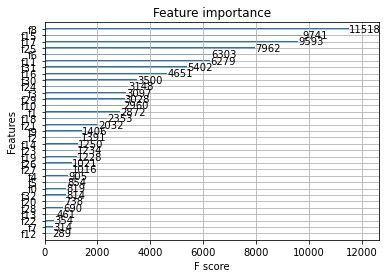

In [99]:
## XGBoost 可解释性分析 -- Feature Importance
from xgboost import plot_importance
plot_importance(xgb_model_fraud)
plt.show()

### 2.Classification
对于迟交货订单进行预测，即Delivery Status= 'Late delivery'

In [77]:
x_late = train_data.loc[:,train_data.columns != 'late_delivery']
y_late = train_data['late_delivery']
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late, y_late, test_size=0.2)

In [78]:
sc = StandardScaler()
x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [79]:
## logistic regression
model_late = LogisticRegression()
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='late delivery')

Model Used: LogisticRegression()
late delivery Accuracy: 98.8339242189231%
late delivery Recall: 97.90672235481304%
late delivery AUC: 98.95336117740652%
late delivery F1 score: 98.94229078210186%
late delivery Confusion Matrix: 
[[15992     0]
 [  421 19691]]


In [84]:
## xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb_model_late = XGBClassifier(colsample_bytree=0.5, 
                    eta=0.01, 
                    gamma=2, 
                    max_depth=8, 
                    min_child_weight=1, 
                    n_estimators=2000, 
                    subsample=0.75)
model_stats(xgb_model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='late delivery')

Model Used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.01, gamma=2,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)
late delivery Accuracy: 99.05550631508973%
late delivery Recall: 98.29772364217251%
late delivery AUC: 99.14886182108627%
late delivery F1 score: 99.14155527024646%
late delivery Confusion Matrix: 
[[16072     0]
 [  341 19691]]


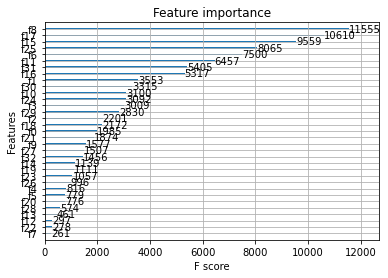

In [96]:
## XGBoost 可解释性分析 -- Feature Importance
from xgboost import plot_importance
plot_importance(xgb_model_late)
plt.show()

### 3. Regression
对于销售额进行预测，即Sales字段

In [100]:
from sklearn.metrics import mean_absolute_error
def regression_model_stats(model, x_train, x_test, y_train, y_test, name):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_pred, y_test)
    
    
    print('Model Used:', model)
    print('{} MAE: {}'.format(name, mae))
    
    return

In [101]:
x_sales = train_data.loc[:,train_data.columns != 'Sales']
y_sales = train_data['Sales']
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2)

In [102]:
sc = StandardScaler()
x_sales_train = sc.fit_transform(x_sales_train)
x_sales_test = sc.transform(x_sales_test)

In [104]:
## xgboost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb_model_sales = XGBRegressor(colsample_bytree=0.5, 
                    eta=0.01, 
                    gamma=2, 
                    max_depth=8, 
                    min_child_weight=1, 
                    n_estimators=2000, 
                    subsample=0.75)
regression_model_stats(xgb_model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='SALES')

Model Used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eta=0.01, gamma=2,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)
SALES MAE: 0.6350254918835788


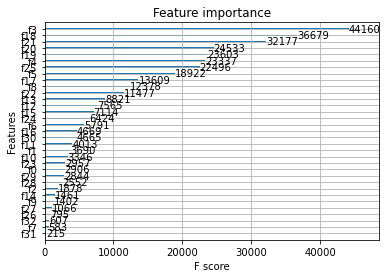

In [105]:
## XGBoost 可解释性分析 -- Feature Importance
from xgboost import plot_importance
plot_importance(xgb_model_sales)
plt.show()

In [111]:
## lightGBM
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMRegressor

lgb_model_sales = LGBMRegressor(colsample_bytree=0.5,
                     learning_rate=0.01,
                     max_depth=-1, 
                     min_child_weight=1,
                     n_estimators=2000, 
                     num_leaves=20, 
                     objective='regression',
                     subsample=0.5)
regression_model_stats(lgb_model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='SALES')

Model Used: LGBMRegressor(colsample_bytree=0.5, learning_rate=0.01, min_child_weight=1,
              n_estimators=2000, num_leaves=20, objective='regression',
              subsample=0.5)
SALES MAE: 1.779263256935747


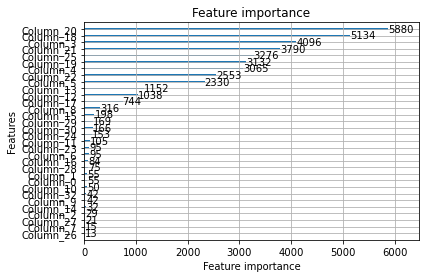

In [113]:
## LightGBM 可解释性分析 -- Feature Importance
lgb.plot_importance(lgb_model_sales)

### 4. Regression
对于订货数量进行预测，即Order Item Quantity

In [106]:
x_itemquant = train_data.loc[:,train_data.columns != 'Order Item Quantity']
y_itemquant = train_data['Order Item Quantity']
x_itemquant_train, x_itemquant_test, y_itemquant_train, y_itemquant_test = train_test_split(x_itemquant, y_itemquant, test_size=0.2)

In [108]:
sc = StandardScaler()
x_itemquant_train = sc.fit_transform(x_itemquant_train)
x_itemquant_test = sc.transform(x_itemquant_test)

In [109]:
## xgboost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb_model_itemquant = XGBRegressor(colsample_bytree=0.5, 
                    eta=0.01, 
                    gamma=2, 
                    max_depth=8, 
                    min_child_weight=1, 
                    n_estimators=2000, 
                    subsample=0.75)
regression_model_stats(xgb_model_itemquant, x_itemquant_train, x_itemquant_test, y_itemquant_train, y_itemquant_test, name='Item sale quantity')

Model Used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eta=0.01, gamma=2,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)
Item sale quantity MAE: 0.02470920914105135


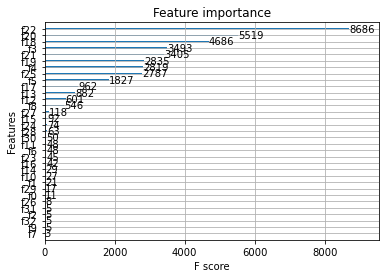

In [110]:
## XGBoost 可解释性分析 -- Feature Importance
from xgboost import plot_importance
plot_importance(xgb_model_itemquant)
plt.show()

In [114]:
## lightGBM
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMRegressor

lgb_model_itemquant = LGBMRegressor(colsample_bytree=0.5,
                     learning_rate=0.01,
                     max_depth=-1, 
                     min_child_weight=1,
                     n_estimators=2000, 
                     num_leaves=20, 
                     objective='regression',
                     subsample=0.5)
regression_model_stats(lgb_model_itemquant, x_itemquant_train, x_itemquant_test, y_itemquant_train, y_itemquant_test, name='Item sale quantity')

Model Used: LGBMRegressor(colsample_bytree=0.5, learning_rate=0.01, min_child_weight=1,
              n_estimators=2000, num_leaves=20, objective='regression',
              subsample=0.5)
Item sale quantity MAE: 0.021625184320747046


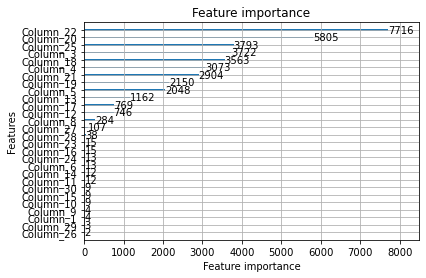

In [115]:
## LightGBM 可解释性分析 -- Feature Importance
lgb.plot_importance(lgb_model_itemquant)